<a href="https://colab.research.google.com/github/frukkurt/OCR_PTVN/blob/main/Dit_pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiT: Self-Supervised Pre-Training for Document Image Transformer
> DiT (Document Image Transformer) is a self-supervised pre-trained Document Image Transformer model using large-scale unlabeled text images for Document AI tasks, which is essential since no supervised counterparts ever exist due to the lack of human labeled document images.

[LINK](https://github.com/microsoft/unilm)

# 1.Install requirement

In [1]:
import os
os.system('pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html')
os.system("git clone https://github.com/microsoft/unilm.git")

import sys
sys.path.append("unilm")

> Check version

In [2]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
torch:  1.12 ; cuda:  cu113


In [3]:
!pip uninstall -y torch torchvision 

Found existing installation: torch 1.12.0+cu113
Uninstalling torch-1.12.0+cu113:
  Successfully uninstalled torch-1.12.0+cu113
Found existing installation: torchvision 0.13.0+cu113
Uninstalling torchvision-0.13.0+cu113:
  Successfully uninstalled torchvision-0.13.0+cu113


In [3]:
!pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 831.4 MB 2.9 kB/s 
     |████████████████████████████████| 22.1 MB 105.1 MB/s 
     |████████████████████████████████| 1.9 MB 9.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu113
    Uninstalling torch-1.12.0+cu113:
      Successfully uninstalled torch-1.12.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.0+cu113
    Uninstalling torchvision-0.13.0+cu113:
      Successfully uninstalled torchvision-0.13.0+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.12.0+cu113
    Uninstalling torchaudio-0.12.0+cu113:
      Successfully uninstalled torchaudio-0.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed

> pls restart session

In [1]:
!pip uninstall -y timm
!pip install timm==0.5.4


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 8.3 MB/s 


In [2]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 7.2 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 140 kB 65.4 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 2.3 MB 54.8 MB/s 
     |████████████████████████████████| 54 kB 4.0 MB/s 
     |████████████████████████████████| 212 kB 66.8 MB/s 
     |████████████████████████████████| 272 kB 72.9 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 1.1 MB 64.8 MB/s 
     |████████████████████████████████| 271 kB 78.1 MB/s 
     |████████████████████████████████| 94 kB 2.8 MB/s 
     |████████████████████████████████| 144 kB 58.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 80 kB 

# 2. RUN Demo

In [10]:
import cv2
import matplotlib.pyplot as plt

from unilm.dit.object_detection.ditod import add_vit_config

import torch

In [4]:
from detectron2.config import CfgNode as CN
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.data import MetadataCatalog
from detectron2.engine import DefaultPredictor

import gradio as gr

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1fwt5vfoOJgu0f1RFDJ1Hr7Mnz48f9s6O?usp=sharing

In [8]:
!python /content/unilm/dit/object_detection/inference.py \
--image_path /content/test_img/test_img5.png \
--output_file_name /content/test_img5_output.jpg \
--config /content/unilm/dit/object_detection/publaynet_configs/maskrcnn/maskrcnn_dit_base.yaml \
--opts MODEL.WEIGHTS https://layoutlm.blob.core.windows.net/dit/dit-fts/publaynet_dit-b_mrcnn.pth \

publaynet_dit-b_mrcnn.pth: 453MB [00:08, 52.1MB/s]               
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-pa

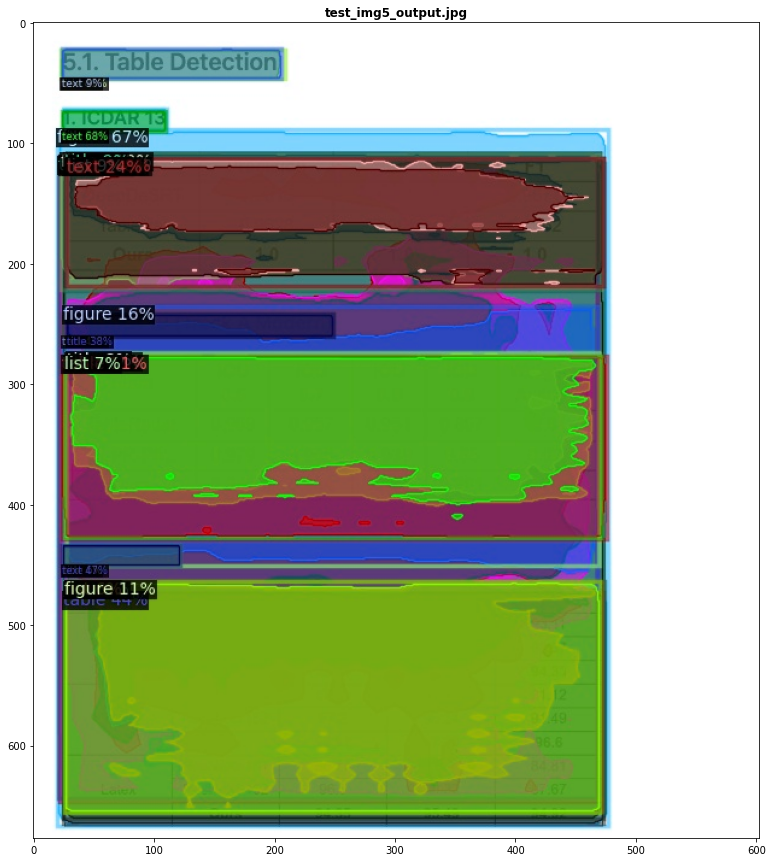

In [13]:
im=cv2.imread('/content/test_img5_output.jpg')
plt.figure(figsize =(15, 15))
plt.title('test_img5_output.jpg',fontweight ="bold")
plt.imshow(im)
plt.show()

In [ ]:
ble

# 3.Run Document Layout Analysis



*   [Dit_large](https://layoutlm.blob.core.windows.net/dit/dit-pts/dit-large-224-p16-500k-d7a2fb.pth)
*   [Cascade R-CNN](https://layoutlm.blob.core.windows.net/dit/dit-fts/publaynet_dit-l_cascade.pth)



In [69]:
# Step 1: instantiate config
cfg = get_cfg()
add_vit_config(cfg)
#cfg.merge_from_file("/content/unilm/dit/object_detection/publaynet_configs/cascade/cascade_dit_base.yaml")
cfg.merge_from_file("/content/unilm/dit/object_detection/publaynet_configs/cascade/cascade_dit_large.yaml")

# Step 2: add model weights URL to config
#cfg.MODEL.WEIGHTS = "https://layoutlm.blob.core.windows.net/dit/dit-fts/publaynet_dit-b_cascade.pth"
cfg.MODEL.WEIGHTS = "https://layoutlm.blob.core.windows.net/dit/dit-fts/publaynet_dit-l_cascade.pth"
# Step 3: set device
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Step 4: define model
predictor = DefaultPredictor(cfg)



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


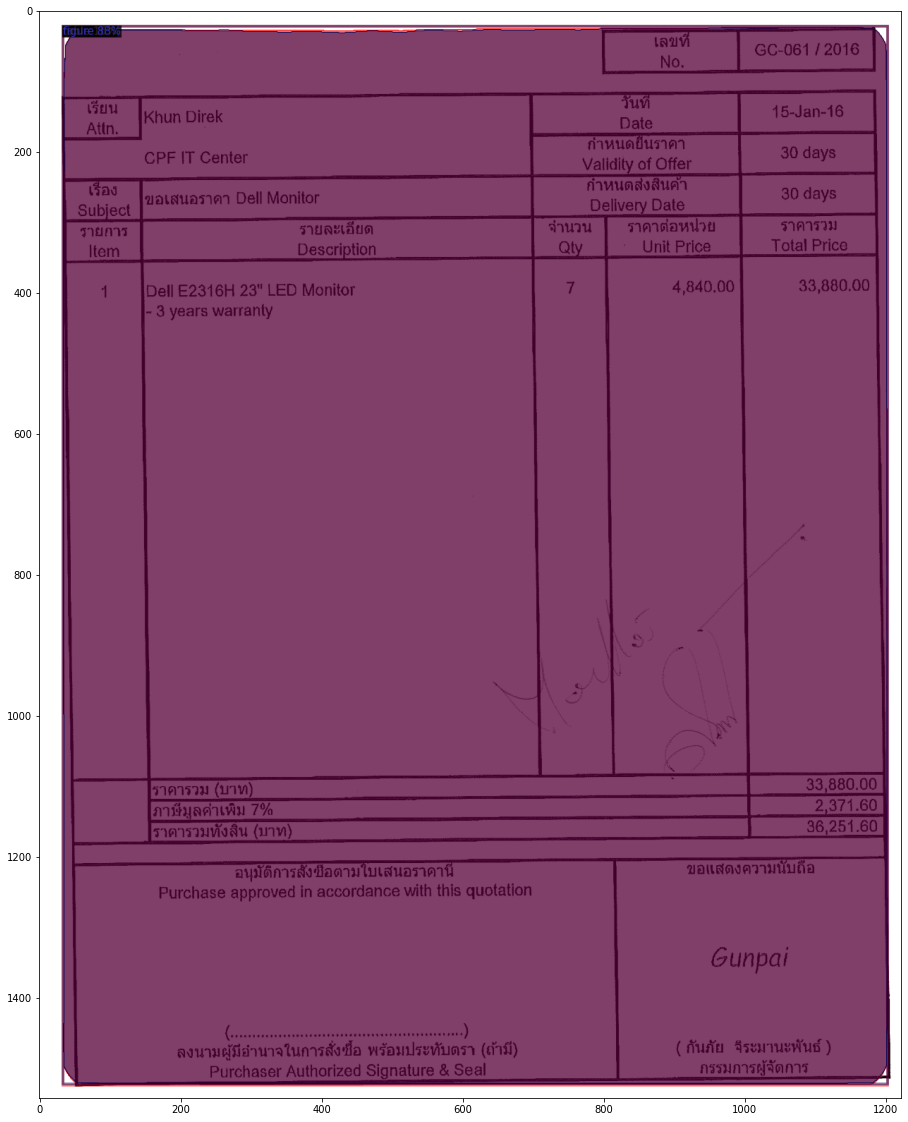

In [70]:
def analyze_image(img,predictor):
    predictor=predictor 
  
    md = MetadataCatalog.get(cfg.DATASETS.TEST[0])
    if cfg.DATASETS.TEST[0]=='icdar2019_test':
        md.set(thing_classes=["table"])
    else:
        md.set(thing_classes=["text","title","list","table","figure"])
    
    output = predictor(img)["instances"]
    v = Visualizer(img[:, :, ::-1],
                    md,
                    scale=1.0,
                    instance_mode=ColorMode.SEGMENTATION)
    result = v.draw_instance_predictions(output.to("cpu"))
    result_image = result.get_image()[:, :, ::-1]
    
    return result_image


img = cv2.imread('/content/test_img/test_img6.png')   
analyze_image(img,predictor)
# from PIL import Image
# image = Image.open("/content/unilm/dit/object_detection/publaynet_example.jpeg").convert('RGB')

# #predictor(image)
# print(image)
plt.figure(figsize=(20,20))
plt.imshow(analyze_image(img,predictor))

In [71]:
# title = "Interactive demo: Document Layout Analysis with DiT"
# description = "Demo for Microsoft's DiT, the Document Image Transformer for state-of-the-art document understanding tasks. This particular model is fine-tuned on PubLayNet, a large dataset for document layout analysis (read more at the links below). To use it, simply upload an image or use the example image below and click 'Submit'. Results will show up in a few seconds. If you want to make the output bigger, right-click on it and select 'Open image in new tab'."
# article = "<p style='text-align: center'><a href='https://arxiv.org/abs/2203.02378' target='_blank'>Paper</a> | <a href='https://github.com/microsoft/unilm/tree/master/dit' target='_blank'>Github Repo</a></p> | <a href='https://huggingface.co/docs/transformers/master/en/model_doc/dit' target='_blank'>HuggingFace doc</a></p>"
# examples =[["/content/unilm/dit/object_detection/publaynet_example.jpeg"]]
# css = ".output-image, .input-image, .image-preview {height: 600px !important}"

# iface = gr.Interface(fn=analyze_image, 
#                      inputs=gr.inputs.Image(type="numpy", label="document image"), 
#                      outputs=gr.outputs.Image(type="numpy", label="annotated document"),
#                      title=title,
#                      description=description,
#                      examples=examples,
#                      article=article,
#                      css=css,
#                      enable_queue=True)
# iface.launch(debug=True)

In [72]:
# import matplotlib.pyplot as plt
# im = cv2.imread('/content/test_img/test_img6.png')

# print(im.shape)
# plt.figure(figsize=(15,7.5))
# plt.imshow(im[..., ::-1])
# plt.show()

# outputs = predictor(im[..., ::-1])
# outputs

In [73]:
!mkdir output_PLN

In [74]:
# v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
# out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# plt.figure(figsize=(20,20))
# plt.imshow(out.get_image()[..., ::-1][..., ::-1])
# plt.show()
#cv2.imwrite("/content/output/test_img6_PLNoutput.jpg", out.get_image()[..., ::-1][..., ::-1])


# def Visualizer_mod(im,save_path=False,show=True):
#   #
#   outputs = predictor(im[..., ::-1])

#   #
#   v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.0)
#   out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

#   if show==True:
#     plt.figure(figsize=(15,15))
#     plt.imshow(out.get_image()[..., ::-1][..., ::-1])
#     plt.show()
  
#   if save_path != False:
#     cv2.imwrite(save_path, out.get_image()[..., ::-1][..., ::-1])

# im = cv2.imread('/content/test_img/test_img3.png')
# Visualizer_mod(im,"/content/output/test_img6_PLNoutput.jpg",show=True)



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


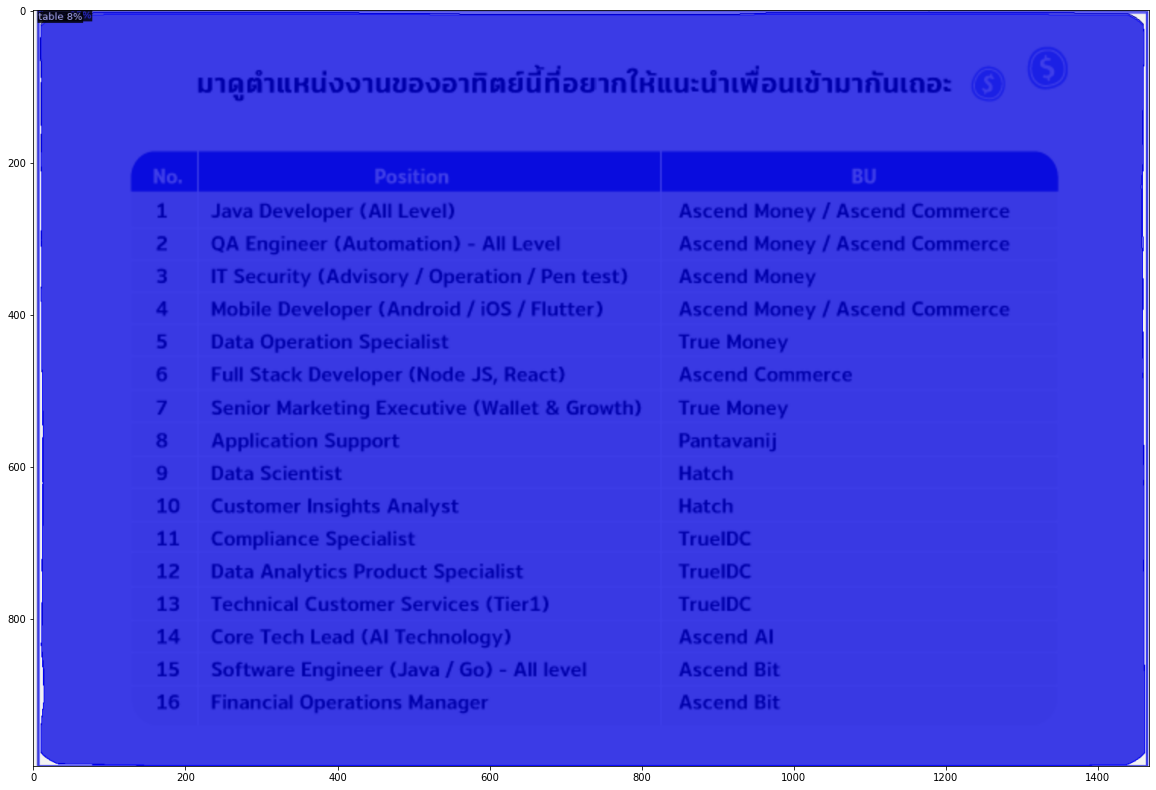

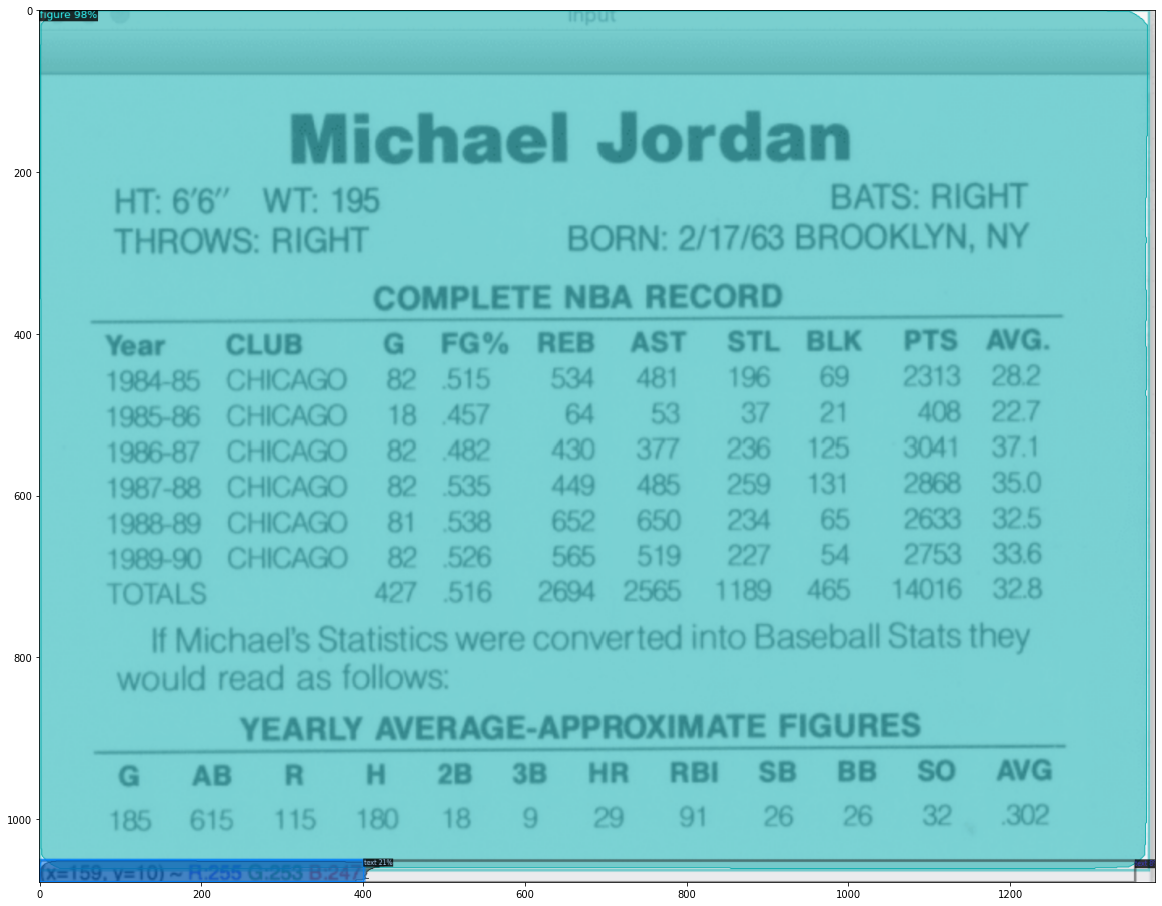

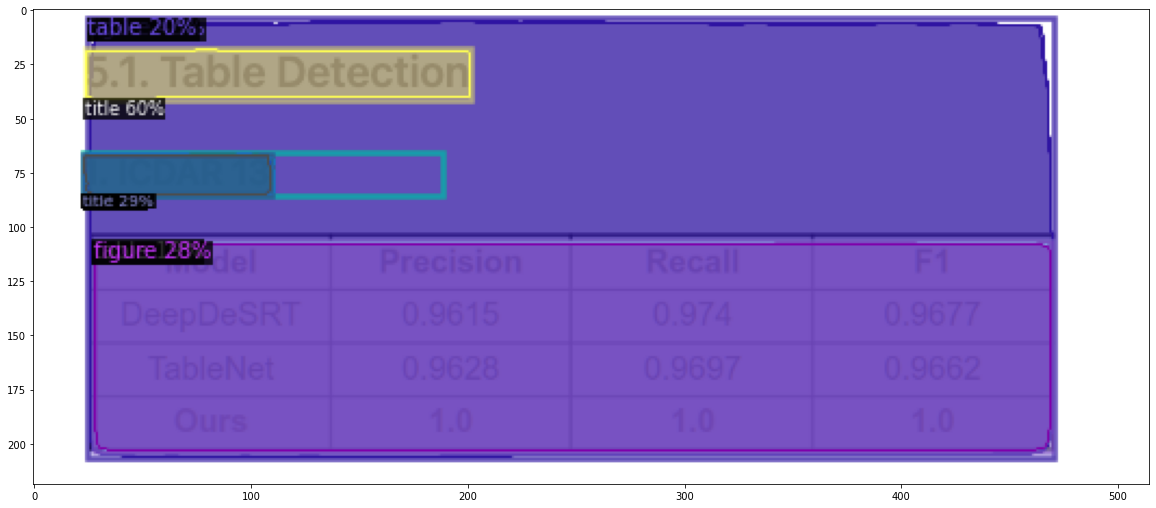

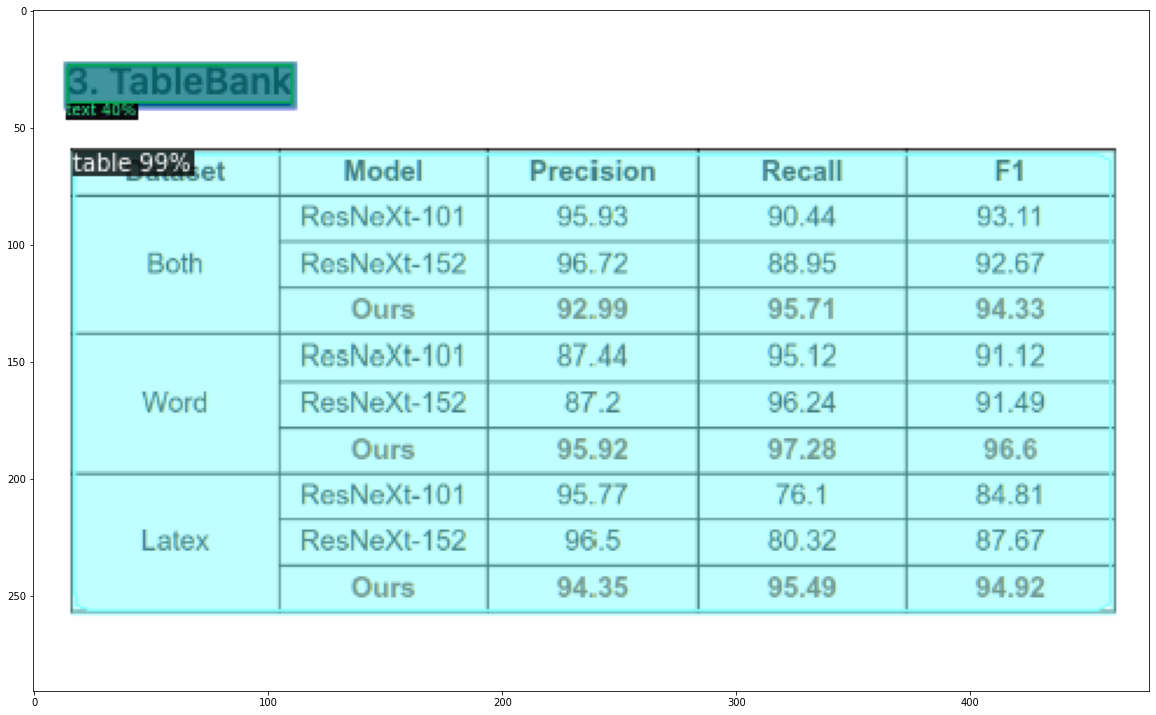

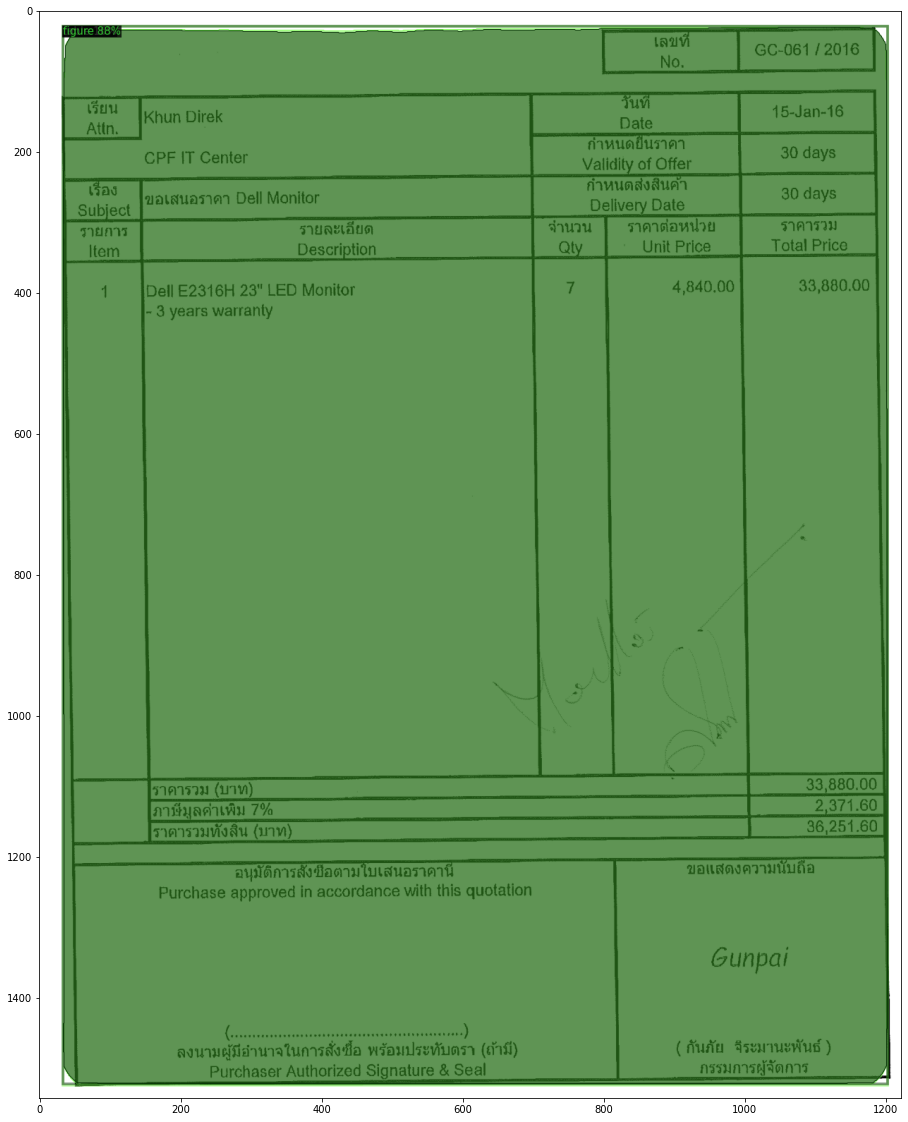

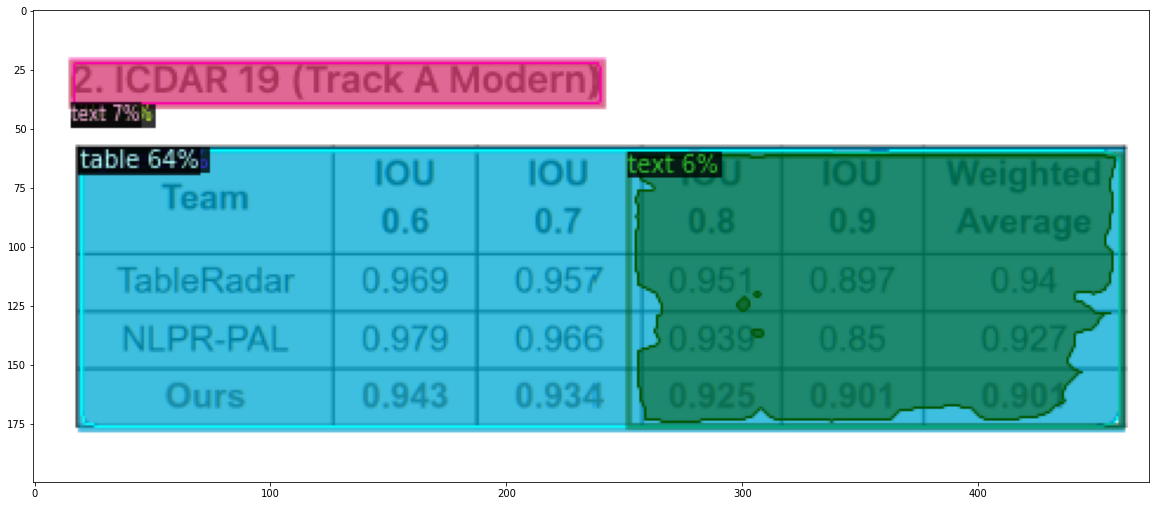

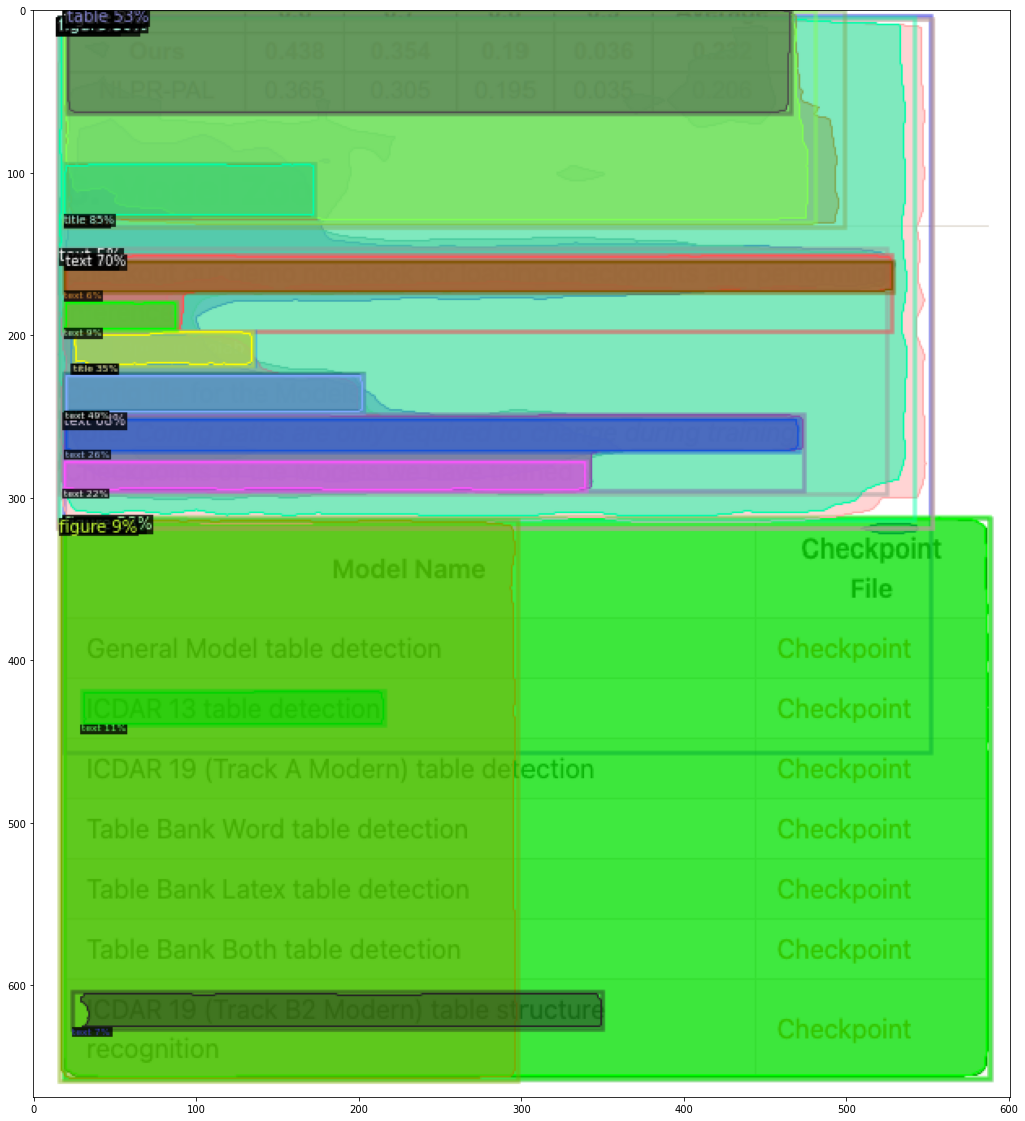

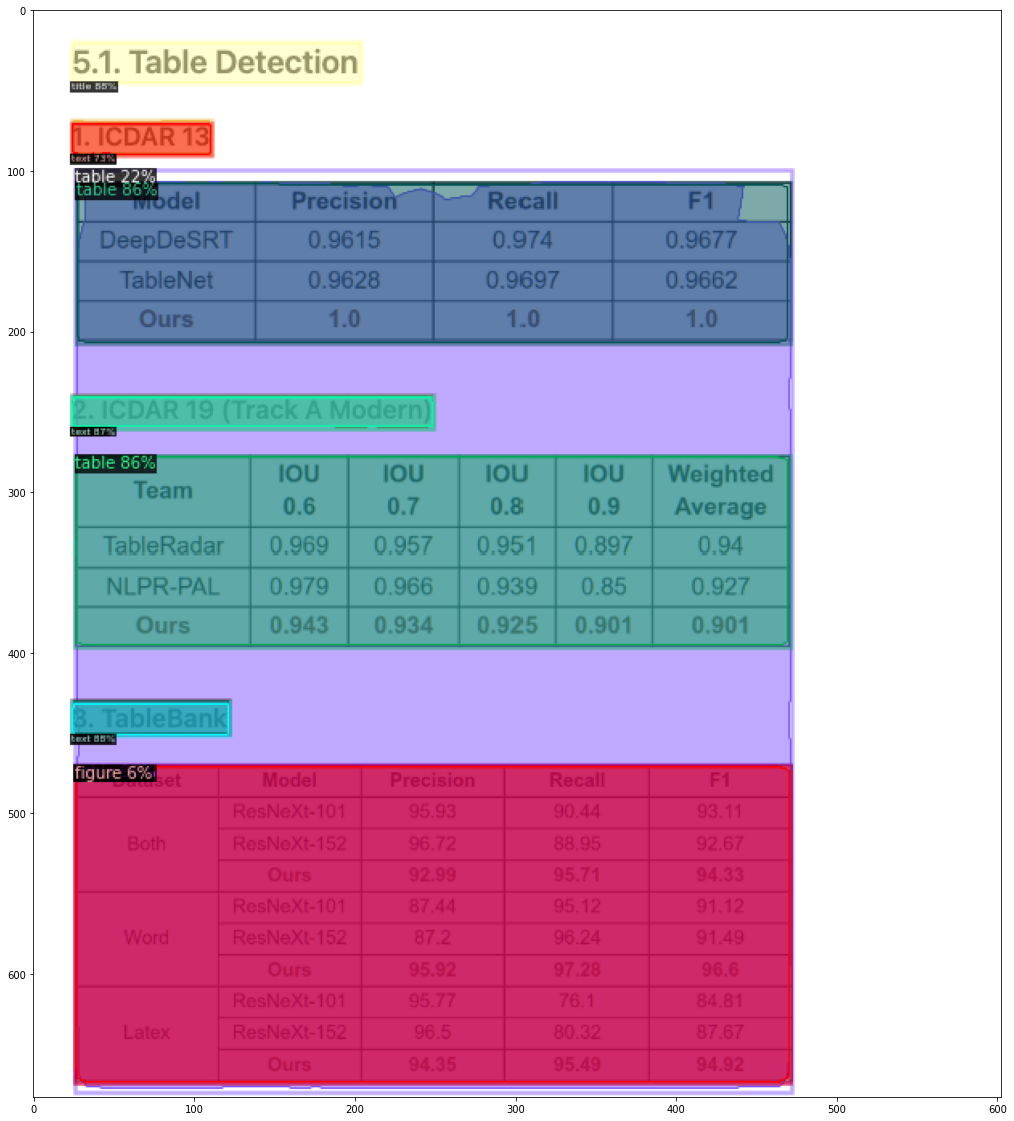

In [75]:

import os
path="/content/test_img/"
lios=os.listdir(path)
for i in lios:
  try:
    im=cv2.imread(path+i)
    save_im="/content/output_PLN/"+i

    res=analyze_image(im,predictor)

    plt.figure(figsize=(20,20))
    plt.imshow(res)

    cv2.imwrite(save_im, res)
  except:
    print(i)

# 4.Run Table Detection



*   [Dit_large](https://layoutlm.blob.core.windows.net/dit/dit-pts/dit-large-224-p16-500k-d7a2fb.pth)
*   [Cascade R-CNN](https://layoutlm.blob.core.windows.net/dit/dit-fts/icdar19archival_dit-l_cascade.pth)



In [91]:
# Step 1: instantiate config
cfg = get_cfg()
add_vit_config(cfg)
cfg.merge_from_file("/content/unilm/dit/object_detection/icdar19_configs/cascade/cascade_dit_large.yaml")

# Step 2: add model weights URL to config
cfg.MODEL.WEIGHTS = "https://layoutlm.blob.core.windows.net/dit/dit-fts/icdar19archival_dit-l_cascade.pth"
# Step 3: set device
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Step 4: define model
predictor = DefaultPredictor(cfg)



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


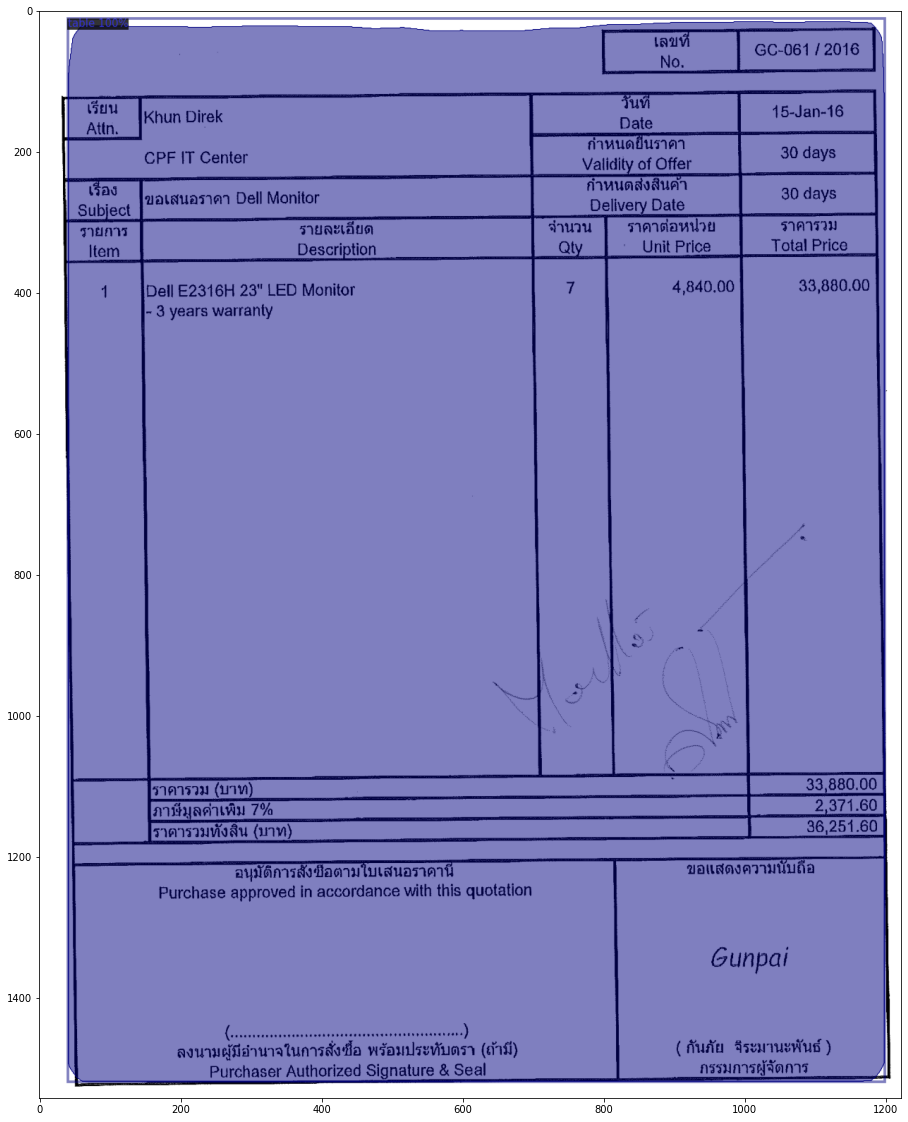

In [92]:

img = cv2.imread('/content/test_img/test_img6.png')   
res=analyze_image(img,predictor)

plt.figure(figsize=(20,20))
plt.imshow(res)

In [93]:
!mkdir output_Table_detection

mkdir: cannot create directory ‘output_Table_detection’: File exists


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


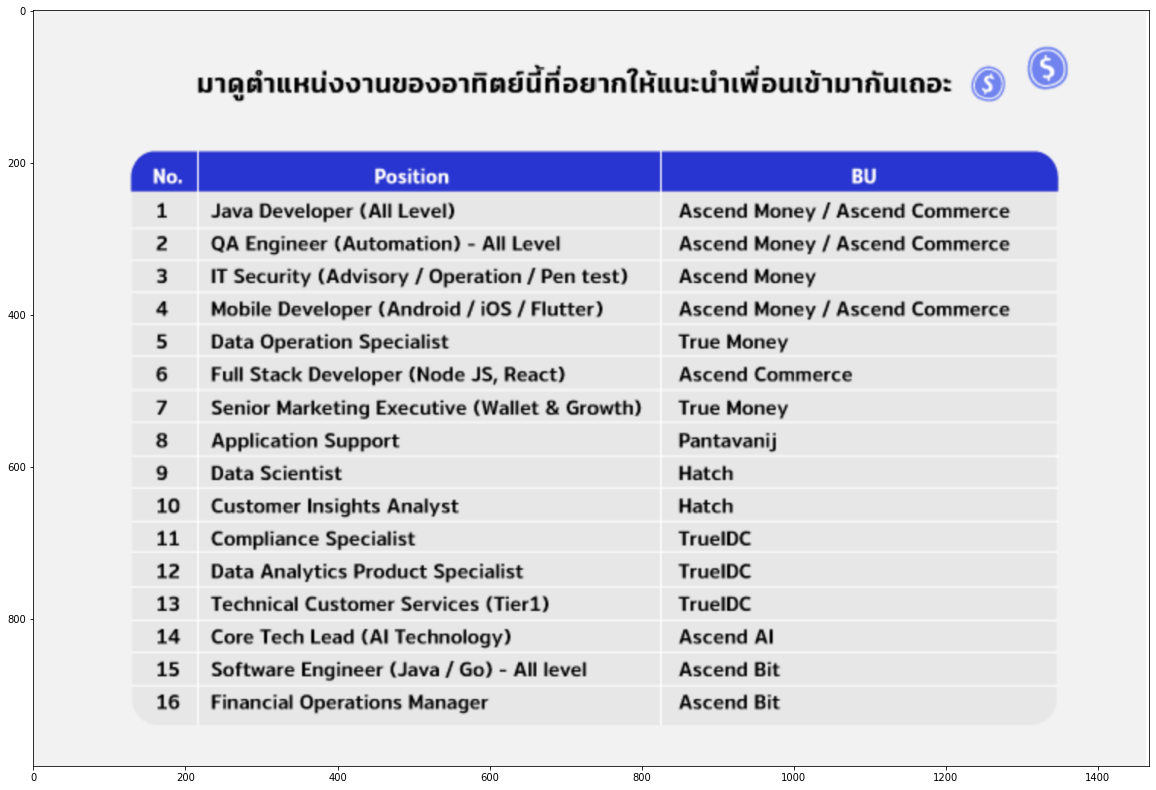

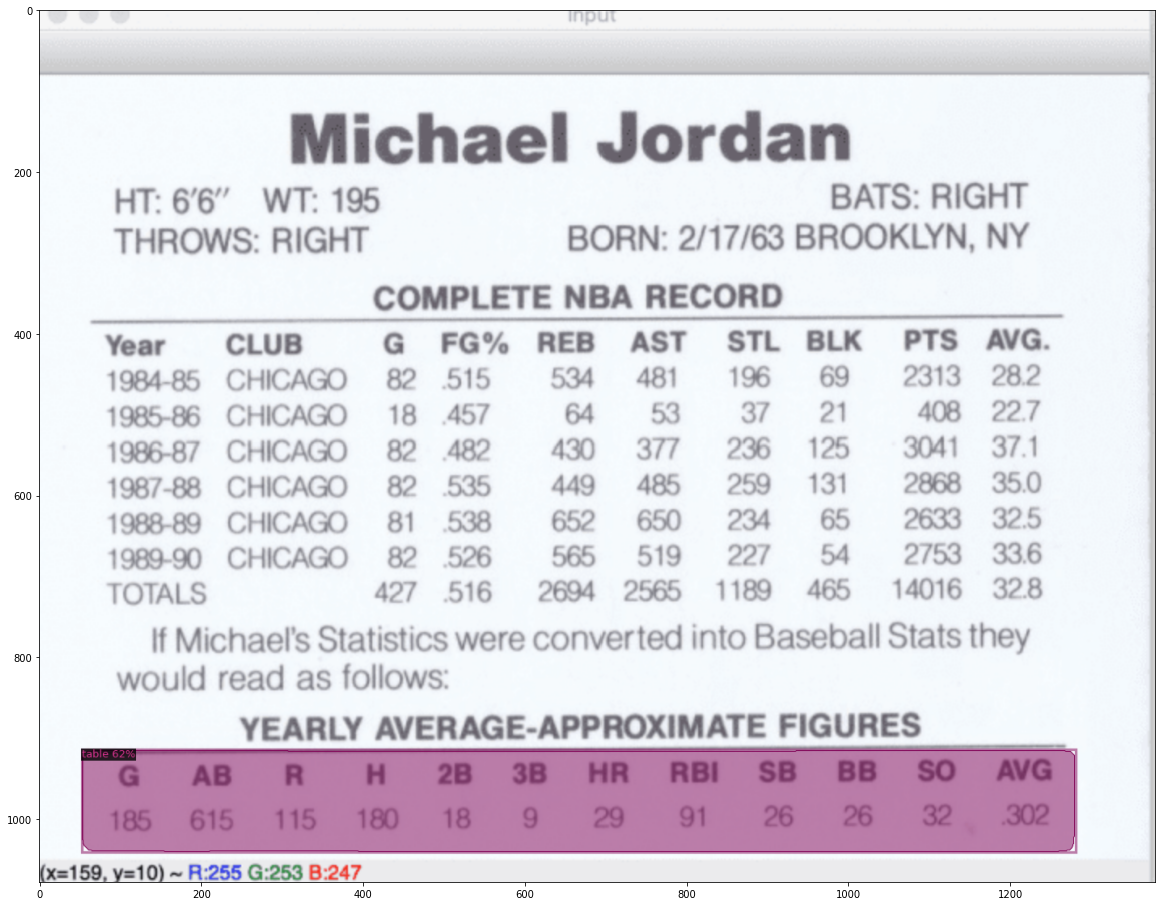

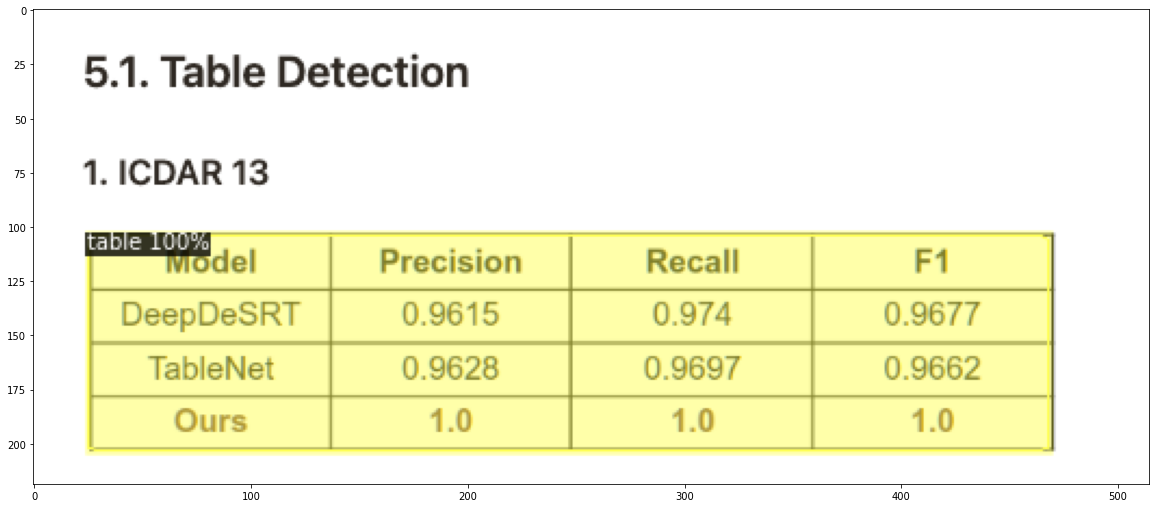

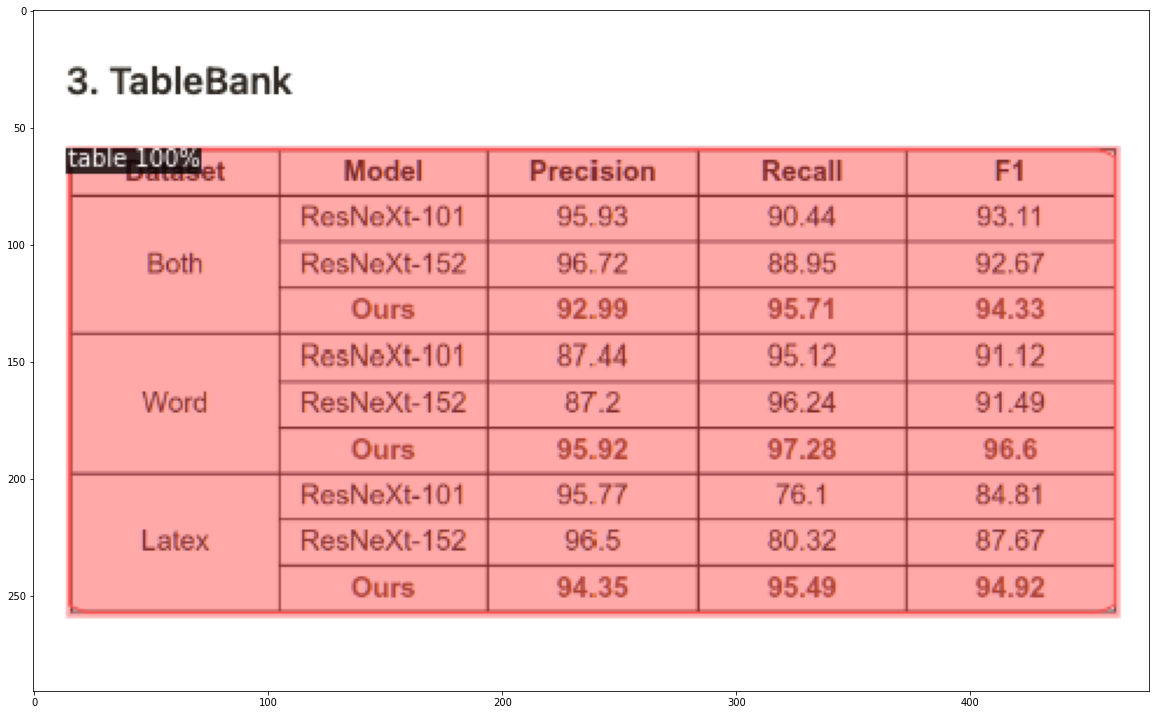

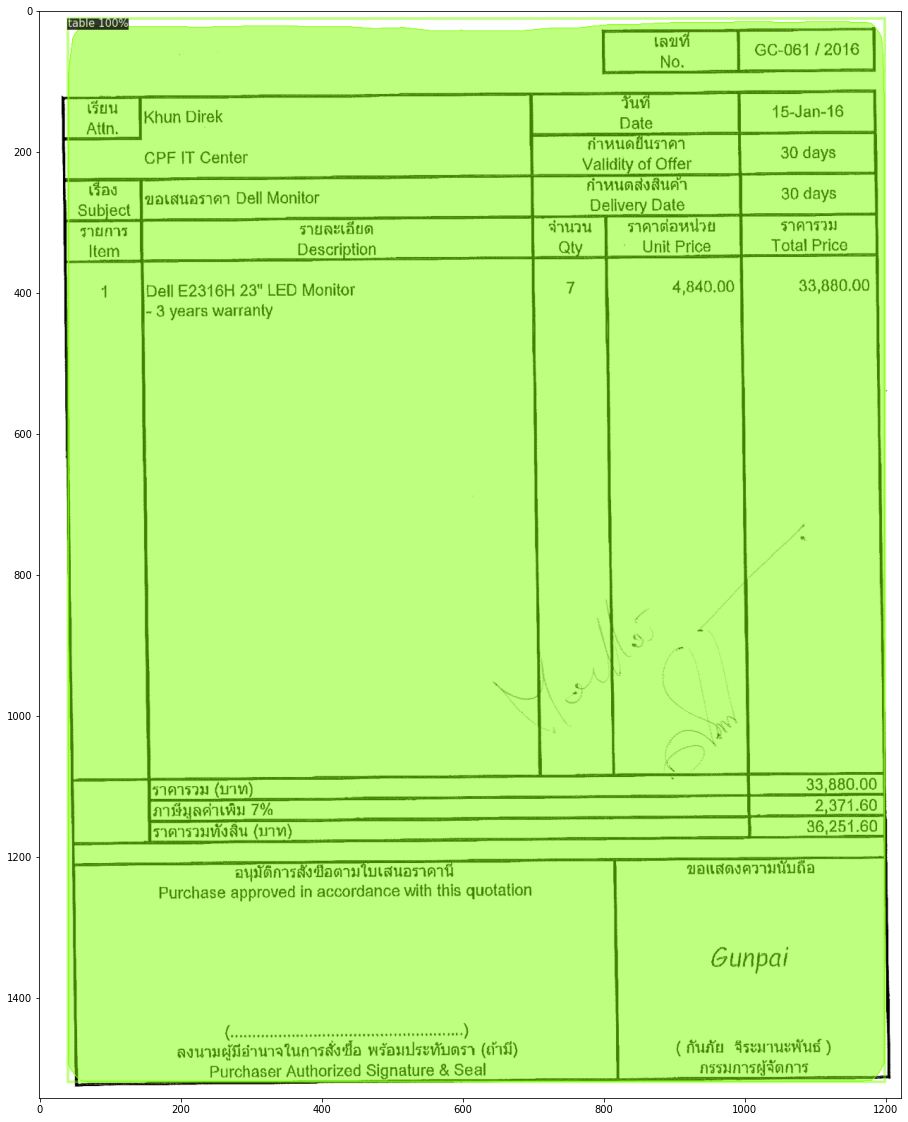

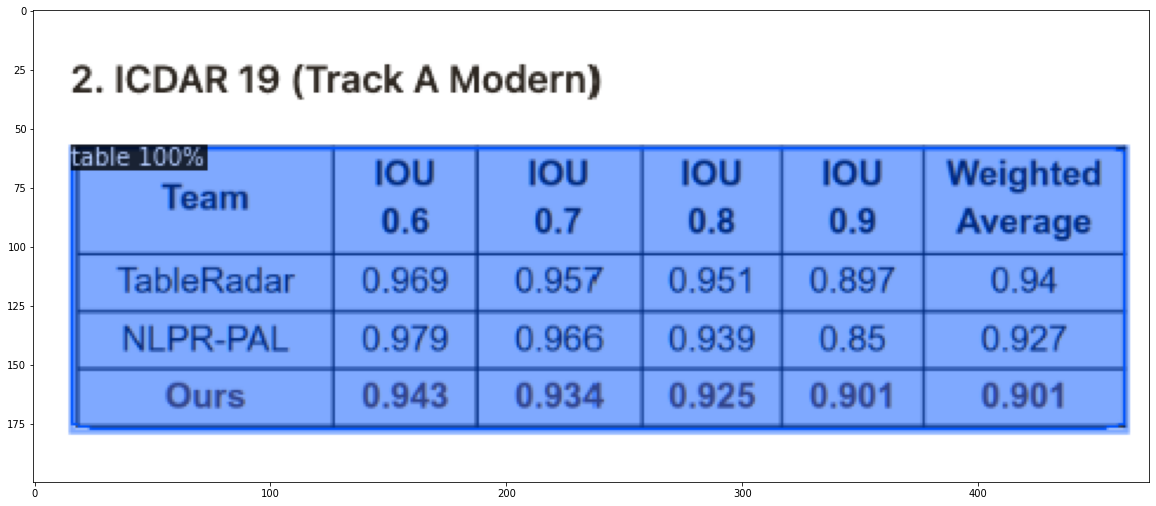

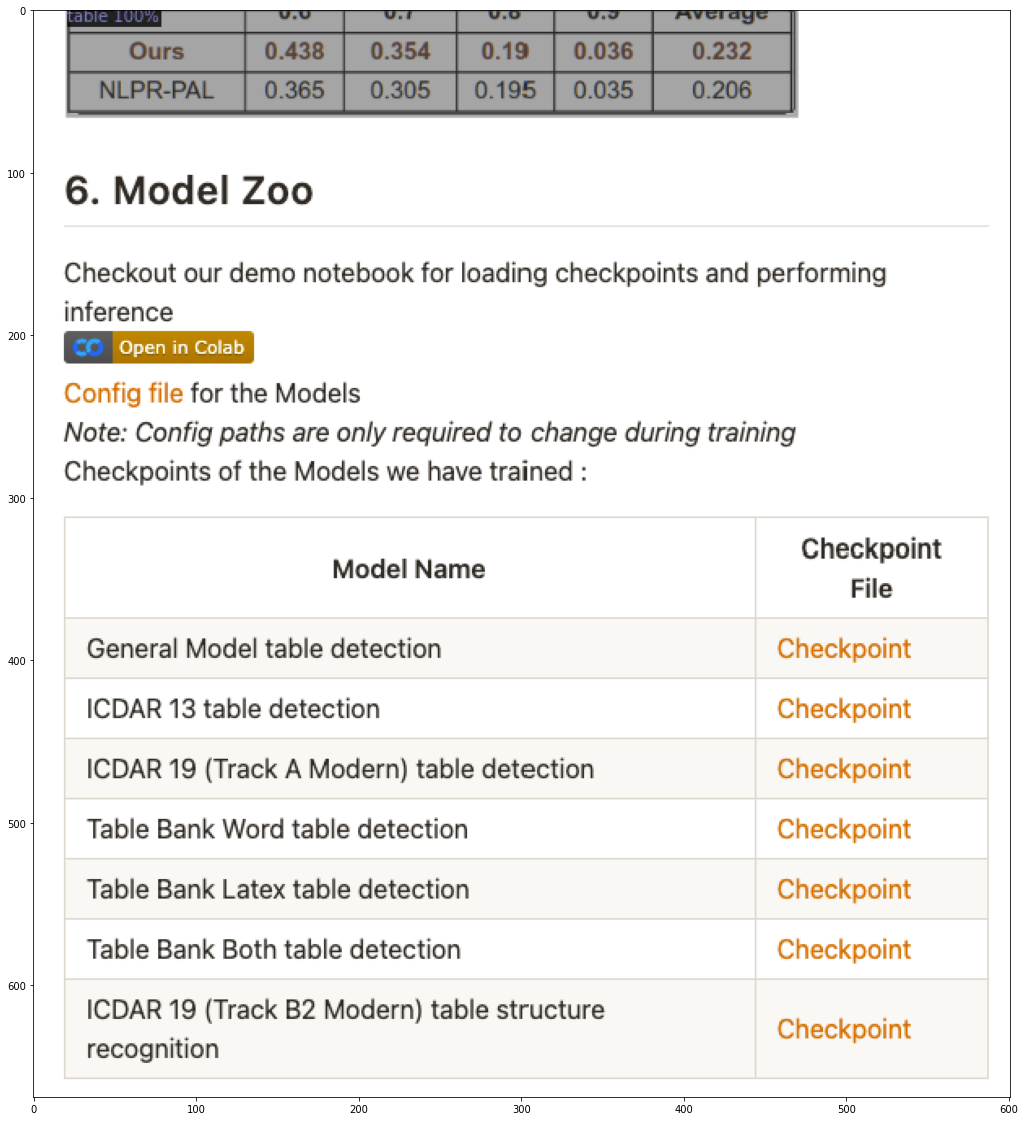

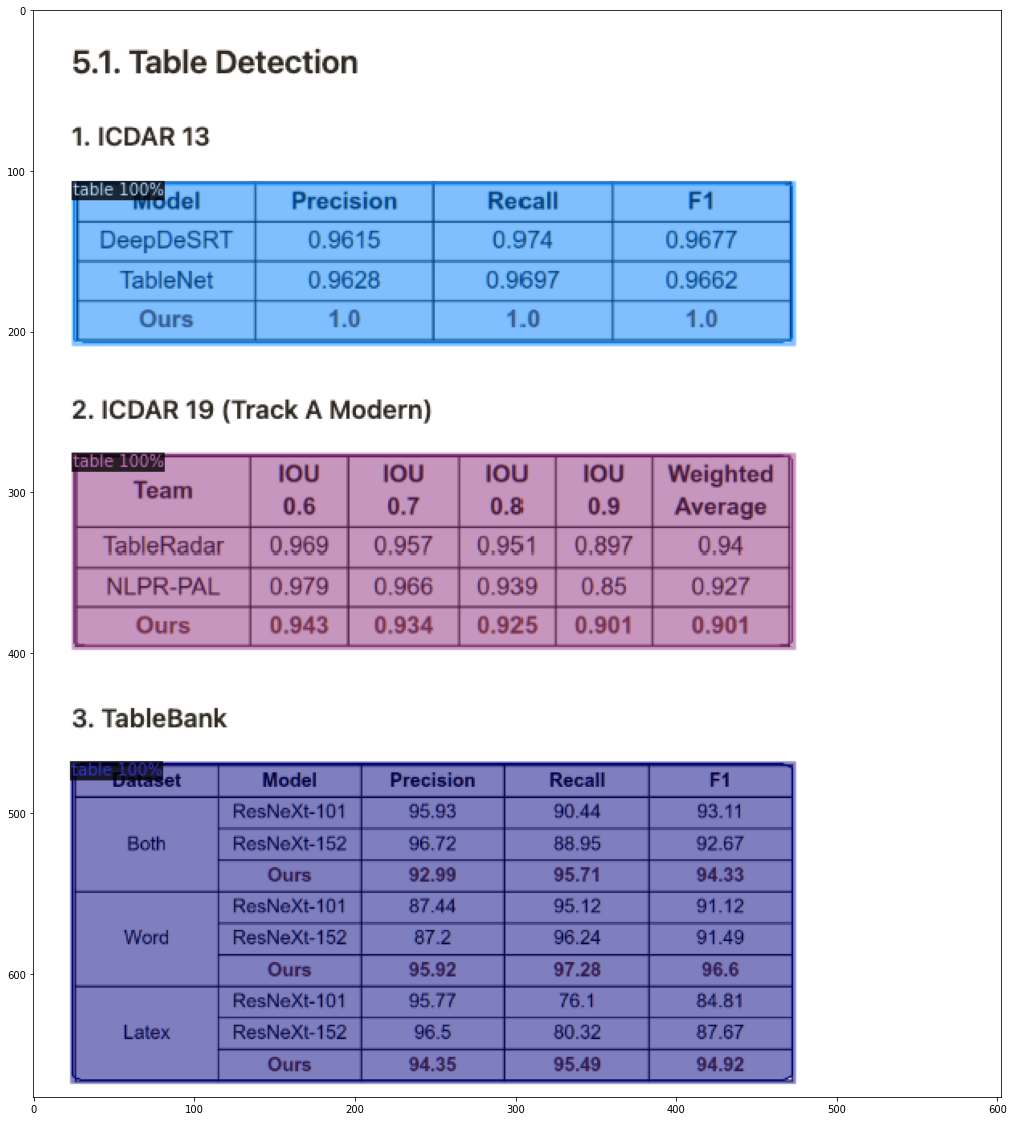

In [94]:

import os
path="/content/test_img/"
lios=os.listdir(path)
for i in lios:
  try:
    im=cv2.imread(path+i)
    save_im="/content/output_Table_detection/"+i

    res=analyze_image(im,predictor)

    plt.figure(figsize=(20,20))
    plt.imshow(res)

    cv2.imwrite(save_im, res)
  except:
    print(i)

# 5.Run Document Image Classification (NOT FINISH)



In [ ]:
!python -m torch.distributed.launch --nproc_per_node=8 --master_port=47770  run_class_finetuning.py \
        --model beit_base_patch16_224          #beit_base_patch16_224 / beit_large_patch16_224
        --data_path "/path/to/rvlcdip"
        --eval_data_path "/path/to/rvlcdip"
        --enable_deepspeed
        --nb_classes 16
        --eval
        --data_set rvlcdip
        --finetune /path/to/model.pth
        --output_dir output_dir
        --log_dir output_dir/tf
        --batch_size 256
        --abs_pos_emb
        --disable_rel_pos_bias

In [96]:
# # Step 1: instantiate config
# cfg = get_cfg()
# add_vit_config(cfg)
# cfg.merge_from_file("/content/unilm/dit/text_detection/configs/mask_rcnn_dit_base.yaml")

# # Step 2: add model weights URL to config
# cfg.MODEL.WEIGHTS = "https://layoutlm.blob.core.windows.net/dit/dit-fts/publaynet_dit-l_mrcnn.pth"
# # Step 3: set device
# cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# # Step 4: define model
# predictor = DefaultPredictor(cfg)



In [97]:

# img = cv2.imread('/content/test_img/test_img6.png')   
# #res=analyze_image(img,predictor)
# # res=predictor(img)["instances"].to("cpu")
# # res
# # plt.figure(figsize=(20,20))
# # plt.imshow(res)

# outputs = predictor(img[..., ::-1])
# outputs
# v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
# out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# plt.figure(figsize=(20,20))
# plt.imshow(out.get_image()[..., ::-1][..., ::-1])
# plt.show()

In [ ]:
# !mkdir output_Table_detection

In [95]:

# import os
# path="/content/test_img/"
# lios=os.listdir(path)
# for i in lios:
#   try:
#     im=cv2.imread(path+i)
#     save_im="/content/output_Table_detection/"+i

#     res=analyze_image(im,predictor)

#     plt.figure(figsize=(20,20))
#     plt.imshow(res)

#     cv2.imwrite(save_im, res)
#   except:
#     print(i)